<a href="https://colab.research.google.com/github/jpandersen61/SQLLiteNotebooks/blob/main/Many_To_Many_Relation_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mange-Til-Mange Relation

Formålet med denne notebook er en lille øvelse i at etablere en mange-til-mange relation i en database med udgangspunkt i nedenstående ER-Diagram:

Opgave(r):
1.   `Student` og `Course` tabellerne er allerede etableret. Etabler mange-til-mange relationen ved at implementere `StudentCourse` tabellen. Husk at indsætte nogle data i tabellen.
2.   Programmer et SQL-udtræk fra databasen, der samlet viser alle data fra de 3 tabeller. (Hint: Brug SQL `JOIN`)














##ER-Diagram

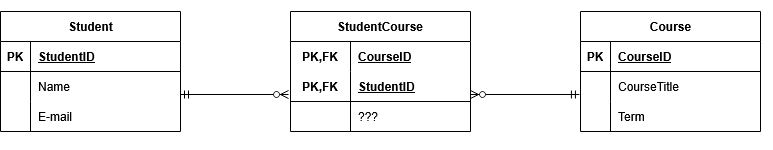

##Importing needed modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

##Connecting to the database

I denne notebook benyttes [SQLite](https://sqlite.org/) databasen, der som det antydes er 'light', men som alligevel er OK til vores formål her, hvilket er at udvikle en database snarere end at drifte den.

In [ ]:
##Avoiding the 'database locked' error:

##Close the 'cursor' if present before proceeding
if 'SQLiteCursor' in globals():
    SQLiteCursor.close()

##Close the database connection if present before proceeding
if 'SQLiteConnetion' in globals():
    SQLiteConnetion.close()

In [ ]:
#Get connection to the sales system data - initially get an empty one
SQLiteConnetion = sqlite3.connect('demo.db')

In [ ]:
# create cursor object
SQLiteCursor = SQLiteConnetion.cursor()

##Slet eksisterende tabeller i databasen

Nedenstående SQL script bliver udført for at "rydde" databasen. Tabeller der er afhængige af andre tabeller bliver slettet først. Det er praktisk at slette alle tabeller først, fordi vi så undgår at skulle ændre i eksisterende tabeller og vi skal så kun koncentrere os om at oprette tabeller påny.

In [ ]:
SQLDropTableScript = """
DROP TABLE IF EXISTS StudentCourse;
DROP TABLE IF EXISTS Student;
DROP TABLE IF EXISTS Course;
"""

In [ ]:
SQLiteCursor.executescript(SQLDropTableScript)

##Oprettelse af database-tabeller

Nedenstående SQL scripts opretter tabellerne i databasen.

In [ ]:
SQLCreateDatabase = """

  CREATE TABLE Student (
     StudentID int NOT NULL PRIMARY KEY,
     Name VARCHAR(50) NOT NULL,
     EMail VARCHAR(100) NOT NULL
     );

  CREATE TABLE Course (
    CourseID int NOT NULL PRIMARY KEY,
    CourseTitle VARCHAR(50) NOT NULL,
    Term int NOT NULL
    );

 CREATE TABLE StudentCourse (
    StudentID int,
    CourseID int,
    Grade char,
    FOREIGN KEY (CourseID) REFERENCES Course(CourseID),
    FOREIGN KEY (StudentID) REFERENCES Student(StudentID),
    PRIMARY KEY (StudentID,CourseID)
    );
"""

In [ ]:
SQLiteCursor.executescript (SQLCreateDatabase)

##Indsæt data i databasen

Nedenstående SQL-scripts indsætter data i databasen. Dette er meget nyttigt for at kunne indsætte eksempel-og testdata, hvor med vi kan demonstrere og teste vores forespørgsler til databasen.

In [ ]:
SQLInsertStudents = """
INSERT INTO Student (StudentID, Name, EMail) VALUES
(1,	'Jane Ford',	'jafo@gmail.com'),
(2,	'Bob Steward',	'bobs@yahoo.com'),
(3,	'Rick Fargo',	'rifgo@outlook.com');
"""

In [ ]:
SQLiteCursor.execute(SQLInsertStudents)

In [ ]:
SQLInsertCourses = """
INSERT INTO Course (CourseID, CourseTitle, Term) VALUES
(1,'Physics',4),
(2,'Mathematics', 4);
"""

In [ ]:
SQLiteCursor.execute(SQLInsertCourses)

In [ ]:
SQLInsertStudentCourses = """
INSERT INTO StudentCourse (StudentID,CourseID, Grade) VALUES
(1,1,'e'),
(1,2,'a'),
(2,1,'c'),
(2,2,'c'),
(3,1,'d');
"""

In [ ]:
SQLiteCursor.execute(SQLInsertStudentCourses)

##Udtræk al data fra alle tabeller

Nedentående scripts trækker alle informationer ud af alle tabeller i databasen. Dette er nyttigt at kunne afgøre om data er blevet importeret korrekt.

In [ ]:
SQLSelectAllFromStudent = """
SELECT * FROM Student
"""
DataFrame = pd.read_sql(SQLSelectAllFromStudent, SQLiteConnetion)
DataFrame

,StudentID,Name,EMail
0,1,Jane Ford,jafo@gmail.com
1,2,Bob Steward,bobs@yahoo.com
2,3,Rick Fargo,rifgo@outlook.com


In [ ]:
SQLSelectAllFromCourse = """
SELECT * FROM Course
"""
DataFrame = pd.read_sql(SQLSelectAllFromCourse, SQLiteConnetion)
DataFrame

,CourseID,CourseTitle,Term
0,1,Physics,4
1,2,Mathematics,4


In [ ]:
SQLSelectAllFromStudentCourse = """
SELECT * FROM StudentCourse
"""
DataFrame = pd.read_sql(SQLSelectAllFromStudentCourse, SQLiteConnetion)
DataFrame

,StudentID,CourseID,Grade
0,1,1,e
1,1,2,a
2,2,1,c
3,2,2,c
4,3,1,d


In [ ]:
SQLSelectAllFromDatabase = """
SELECT *
FROM Student
JOIN StudentCourse ON Student.StudentID=StudentCourse.StudentID
JOIN Course ON StudentCourse.CourseID=Course.CourseID;
"""
DataFrame = pd.read_sql(SQLSelectAllFromDatabase, SQLiteConnetion)
DataFrame

,StudentID,Name,EMail,StudentID,CourseID,Grade,CourseID,CourseTitle,Term
0,1,Jane Ford,jafo@gmail.com,1,1,e,1,Physics,4
1,1,Jane Ford,jafo@gmail.com,1,2,a,2,Mathematics,4
2,2,Bob Steward,bobs@yahoo.com,2,1,c,1,Physics,4
3,2,Bob Steward,bobs@yahoo.com,2,2,c,2,Mathematics,4
4,3,Rick Fargo,rifgo@outlook.com,3,1,d,1,Physics,4


In [ ]:
SQLSelectAllFromDatabaseLimited = """
SELECT Student.StudentID,Student.Name,StudentCourse.Grade,Course.CourseID,Course.CourseTitle,Course.Term
FROM Student
JOIN StudentCourse ON Student.StudentID=StudentCourse.StudentID
JOIN Course ON StudentCourse.CourseID=Course.CourseID;
"""
DataFrame = pd.read_sql(SQLSelectAllFromDatabaseLimited, SQLiteConnetion)
DataFrame

,StudentID,Name,Grade,CourseID,CourseTitle,Term
0,1,Jane Ford,e,1,Physics,4
1,1,Jane Ford,a,2,Mathematics,4
2,2,Bob Steward,c,1,Physics,4
3,2,Bob Steward,c,2,Mathematics,4
4,3,Rick Fargo,d,1,Physics,4
